# Notes

Different problems in this assignment give different number of points: 2, 3, or 4, depending on how complex a problem is. Otherwise, guidlines are the same as in Assignment 1 and each problem contains specific validation details.

In [1]:
from lxml.parser import result
from numpy.core.numeric import newaxis
%pylab inline
plt.style.use("bmh")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [60]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np

In [4]:
STUDENT = "Amir Alikulov and Ruslan Shuvalov"
ASSIGNMENT = 2
TEST = False

In [5]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 16

# NumPy broadcasting

### 1. Normalize matrix rows (2 points).

For a 2-dimensional array `arr`, calculate an array, in which each row is a normalized version of the corresponding row from `arr`.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[0] = (arr[0] - np.mean(arr[0])) / np.std(arr[0])` and so on for other rows.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values are drawn from a normal distribution (`np.random.normal`) with random mean and standard deviation.

In [55]:
def norm_rows(arr):
    return (arr - np.mean(arr, axis=1, keepdims=True)) / np.std(arr, axis=1, keepdims=True)

In [ ]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_rows)

### 2. Normalize matrix columns (2 points).

Similar to Problem 1, but normalization must be performed along columns.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[:, 0] = (arr[:, 0] - np.mean(arr[:, 0])) / np.std(arr[:, 0])` and so on for other columns.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values are drawn from a normal distribution (`np.random.normal`) with random mean and standard deviation.

In [54]:
def norm_cols(arr):
    return (arr - np.mean(arr, axis=0)) / np.std(arr, axis=0)
    

In [ ]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_cols)

### 3. Generic normalize routine (2 points).

Similar to Problems 1 and 2, but normalization must be performed according to `axis` argument. `axis=0` means normalization along the columns, and `axis=1` means normalization along the rows.

In [ ]:
def norm(arr, axis):
    mean = np.mean(arr, axis=axis, keepdims=True)
    std = np.std(arr, axis=axis, keepdims=True)
    return (arr - mean) / std


In [ ]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm)

### 4. Dot product of matrix and vector (2 points).

Calculate dot product of a 2-dimensional array $M$ of shape $(N,K)$ and 1-dimensional row vector $v$ of shape $(K,)$. You cannot use `np.dot` in this exercise.

Result must be **1-dimensional** of shape $(N,)$, and **will be tested against three random combinations of input arrays dimensions ($10 \leq n < 100 $)**. Arrays values will are
drawn from standard normal distribution (`np.random.randn`).

In [53]:
def dot(m, v):
    return np.sum(m * v, axis=1)

In [ ]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, dot)

### 5. Calculate recurrence matrix (3 points).

In signals (or time series) analysis, it's usualy important to quickly assess the structure (if any) of the data. This can be done in many different ways. You can test, whether a signal is stationary or look at Fourier transform to understand the frequency composition of a signal. When you want to understand, whether signal contains some recurring pattern, it's useful to perform what is called *recurrent quantification analysis*.

Imagine a signal $s_i$. Recurrence matrix is then:

$$
R_{ij} = \left\{
\begin{array}{l}
1, |s_i-s_j|<\varepsilon \\
0, |s_i-s_j|\ge\varepsilon \\
\end{array}
\right.
$$

In this exercise you need to implement a function, which calculates recurrence matrix for 1-dimensional array. The function should not use any loops and must leverage broadcasting. For reference, naive loop implementation is provided below. Plot recurrence matrices for some signals to understand, how signal structure reveals itself in the recurrence matrix.

For example, for a signal of shape $(100,)$ result must be of shape $(100, 100)$. Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)** with different signal patterns (noise, $\sin$, noise + randomly-placed recurrent pattern).

In [75]:
def recm_naive(ts, eps):
    """Loop implementation of recurrent matrix."""

    ln = len(ts)

    rm = np.zeros((ln, ln), dtype=bool)

    for i in range(ln):
        for j in range(ln):
            rm[i, j] = np.abs(ts[i]-ts[j])<eps
    return rm

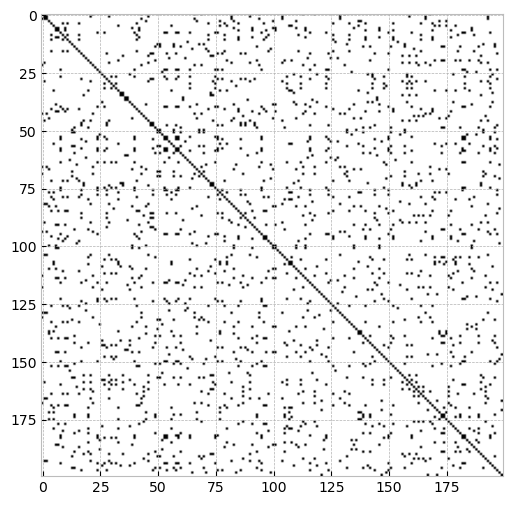

In [76]:
random_signal = np.random.randn(200)
plt.imshow(recm_naive(random_signal, 1e-1), cmap=plt.cm.binary)
plt.show()

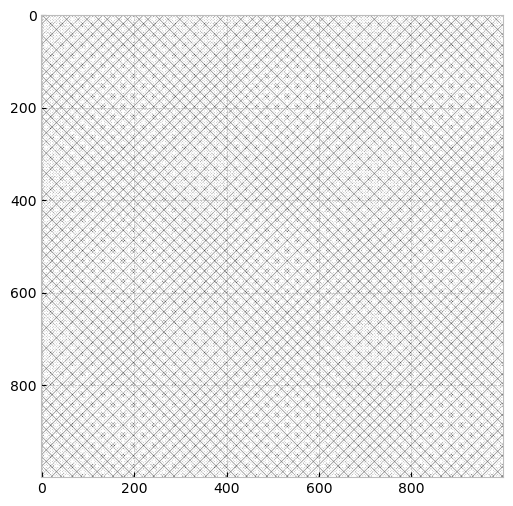

In [77]:
sin_signal = np.sin(np.arange(1000))
plt.imshow(recm_naive(sin_signal, 1e-1), cmap=plt.cm.binary)
plt.show()

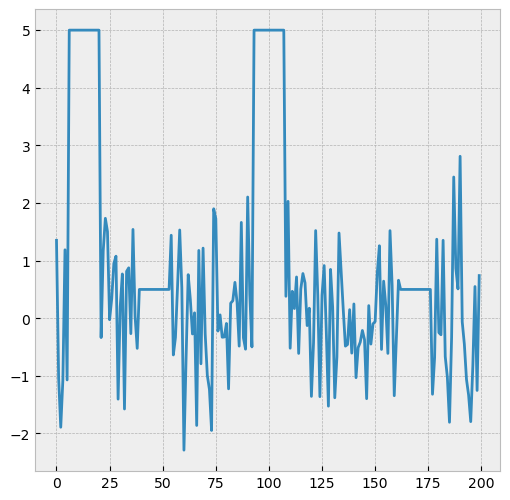

In [78]:
random_signal = np.random.randn(200)
random_signal[6:21] = 5 * np.ones((15,))
random_signal[93:108] = 5 * np.ones((15,))

random_signal[39:54] = 0.5 * np.ones((15,))
random_signal[162:177] = 0.5 * np.ones((15,))

plt.plot(random_signal)
plt.show()

plt.imshow(recm_naive(random_signal, 5e-1), cmap=plt.cm.binary)

In [74]:
def recm(ts, eps):
    
    ts = ts[:, np.newaxis]
    return np.abs(ts - ts.T) < eps


In [ ]:
PROBLEM_ID = 5

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, recm)

### 6. Softmax activation function (1 point).

Given a 2-dimensional array, calculate it's $\texttt{softmax}$ for each row. $\texttt{softmax}$ activation for a vector is defined as the following:

$$
\texttt{softmax} (x_i) = \frac{e^{x_i}}{\sum_i e^{x_i}}.
$$

Correspondingly, for entire array the expression is the following:

$$
\texttt{softmax} (x_{ij}) = \frac{e^{x_{ij}}}{\sum_j e^{x_{ij}}}.
$$



For example, an input array

$$
\left(
\begin{array}{cc}
1 && 6 \\
4 && 5
\end{array}
\right)
$$

results in the following $\texttt{softmax}$ activation:

$$
\left(
\begin{array}{cc}
\frac{e^1}{e^1 + e^6} && \frac{e^6}{e^1 + e^6} \\
\frac{e^4}{e^4 + e^5} && \frac{e^5}{e^4 + e^5}
\end{array}
\right)
$$

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array elements are drawn from the standard normal distribution.

**Hint:** besides using universal functions, you will need to use broadcasting properly.

In [ ]:
def softmax(arr):
    exp_matrix = np.exp(arr)
    row_sums = np.sum(exp_matrix, axis=1, keepdims=True)
    softmaxed_matrix = exp_matrix / row_sums
    
    return softmaxed_matrix
    
    

In [ ]:
PROBLEM_ID = 6

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, softmax)

### 7. Cosine similarity of 2 vectors (1 point).

**Cosine similarity** is a measure of similarity between two vectors.\
It's defined as the cosine of the angle between these two vectors, that is, the dot product of the vectors divided by the product of their lengths.

$$
\texttt{cosine similarity} (A, B) = \frac{A \cdot B}{\|A\|\|B\|}
$$

It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle.

The cosine similarity always belongs to the interval *[-1,1]*:
* two proportional vectors have a cosine similarity of 1,
* two orthogonal vectors have a similarity of 0,
* and two opposite vectors have a similarity of -1.

The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in *[0,1]*

For example, in many NLP tasks, each word is assigned a different coordinate (vector) and a document is represented by the vector of the numbers of occurrences of each word in the document. Cosine similarity then gives a useful measure of how similar two documents are likely to be, in terms of their subject matter, and independently of the length of the documents.

You should implement a function that receives 2 vectors with same length and returns a cosine similarity of these two vectors.\
You can assume that both input vectors are 1D vectors with shape (N,).\
When implementing this, don't use existing cosine similarity or norm numpy functions, but implement using basic numpy functions.


In [102]:
def cosine_sim(m, v):
    
    dot_product = np.sum(m * v)
    
    m_length = np.sqrt(np.sum(np.power(m, 2)))
    v_length = np.sqrt(np.sum(np.power(v, 2)))
    
    return dot_product / (m_length * v_length)


In [ ]:
PROBLEM_ID = 7

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, cosine_sim)

### 8. Cosine similarity matrix (3 points).

You should implement a function that receives 2 dimensional array, composed of vectors (each row is a vector), and returns a matrix with cosine similariy between any 2 vectors in the array.

For example, if the original matrix is of shape $(N,K)$, it means that we have $N$ vectors and $K$ dimensions.\
Therefore,  the resulting matrix will be $(N,N)$ and will include similarity between every $N$ vectors in the original matrix.

You should implement it from scratch without using any existing function that calculates cosine similarity.

**Hint**: use boradcasting

In [111]:
def sim_matrix(m):
    return print(np.dot(m, np.transpose(m))/(np.sqrt(np.sum(m**2))* np.sqrt(np.sum(np.transpose(m)**2))))

    

In [ ]:
PROBLEM_ID = 8

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, sim_matrix)

# Your grade

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")